# Build the first machine learning model

In [1]:
# Import modelues

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualizations style
%matplotlib inline
sns.set()

# import data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/predict_test.csv')

In [2]:
# store target variable of training data in a save place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis = 1), df_test])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


###### There are 2 numerical variables that have missing values 'Age' and 'Fare'

In [4]:
# Impute missing numerical variables using the median of these variables.
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

# Check out info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


###### We want to encode our data with numbers, for example to change 'male' and 'female' to numbers. 
###### To do so we will use pandas and the function get_dummies to do so.

In [5]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


###### Build the first model, selct the columns [ 'Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp'] from DataFrame

In [6]:
data = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex_male    1309 non-null uint8
Fare        1309 non-null float64
Age         1309 non-null float64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


###### Create a model

In [8]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

##### We use scikit-learn, which requires our data in arrays, not DataFrames, we need to transform them

In [9]:
X = data_train.values
test = data_test.values
y = survived_train.values

In [10]:
# Instantiate model and fit to data

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###### Now make predictions on the test set, create a new column 'Survived' and store your predictions in it.

In [15]:
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred

In [16]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/1st_dec_tree.csv', index=False)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42, stratify=y)

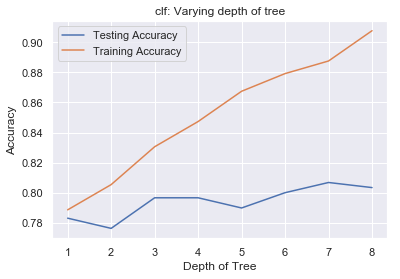

In [21]:
# set up arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # set up a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)
    
    # Fit the classifier on the training set
    clf.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)
    
# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.show()